In [1]:
from google.colab.patches import cv2_imshow
import cv2
import zipfile


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Upload dataset onto google Colab
# Extract dataset .zip file to colab
zip_file_path = "/content/drive/MyDrive/GBC/Mediapipe-Naruto/dataset_hand_gestures.zip"
extract_to_directory = "/content"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

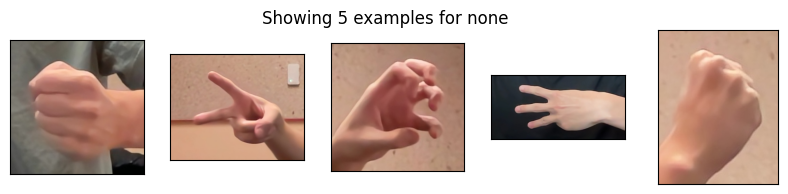

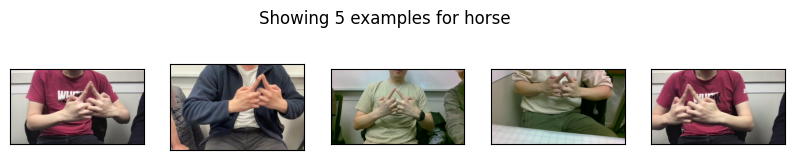

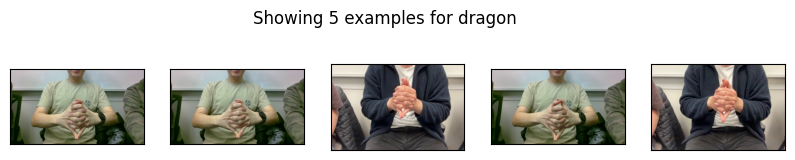

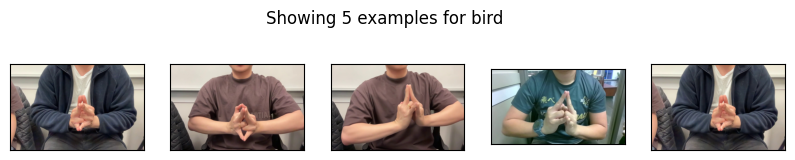

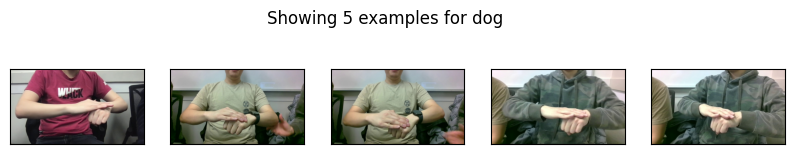

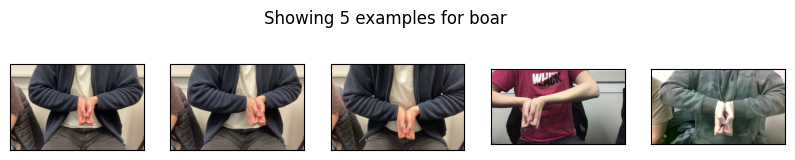

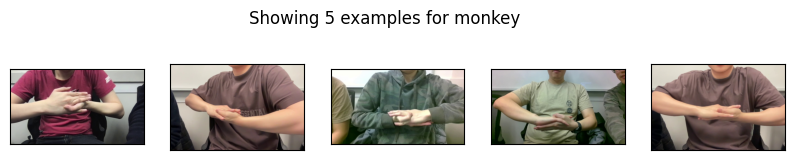

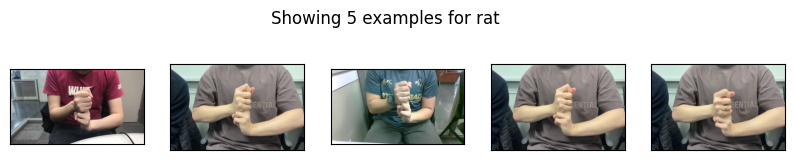

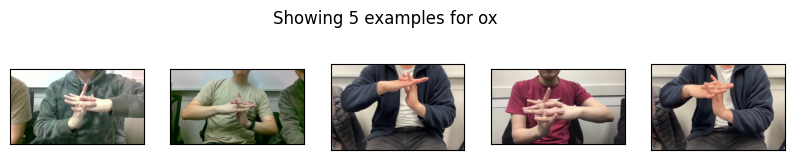

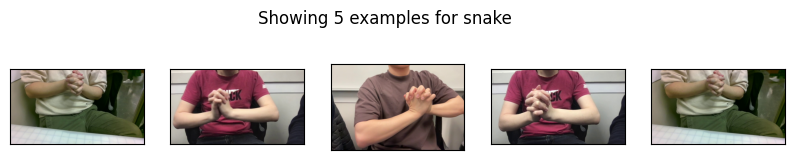

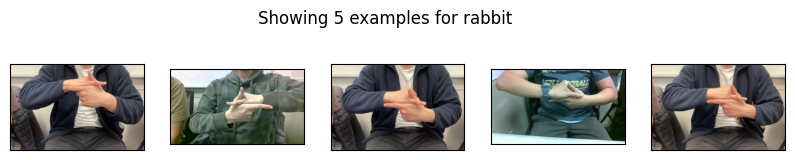

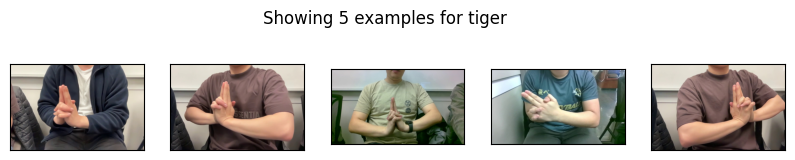

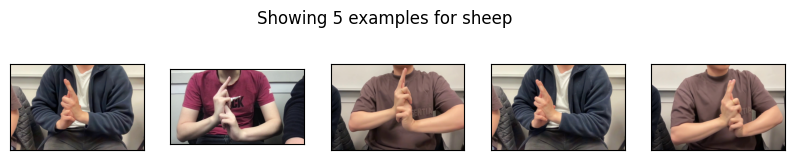

In [4]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "dataset_hand_gestures"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Making a New Model



In [5]:
!pip install -q mediapipe-model-maker
!pip install 'keras<3.0.0' mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.8 MB/s et

In [6]:
# Import the necessary modules.
from mediapipe_model_maker import gesture_recognizer

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [7]:
import os

# Define the directory path
directory = "/content/dataset_hand_gestures/"

# Function to delete .DS_Store files
def delete_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == ".DS_Store":
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted {file_path}")

# Call the function to delete .DS_Store files
delete_ds_store(directory)

Deleted /content/dataset_hand_gestures/.DS_Store
Deleted /content/dataset_hand_gestures/none/.DS_Store
Deleted /content/dataset_hand_gestures/horse/.DS_Store
Deleted /content/dataset_hand_gestures/dragon/.DS_Store
Deleted /content/dataset_hand_gestures/bird/.DS_Store
Deleted /content/dataset_hand_gestures/dog/.DS_Store
Deleted /content/dataset_hand_gestures/boar/.DS_Store
Deleted /content/dataset_hand_gestures/monkey/.DS_Store
Deleted /content/dataset_hand_gestures/rat/.DS_Store
Deleted /content/dataset_hand_gestures/ox/.DS_Store
Deleted /content/dataset_hand_gestures/snake/.DS_Store
Deleted /content/dataset_hand_gestures/rabbit/.DS_Store
Deleted /content/dataset_hand_gestures/tiger/.DS_Store
Deleted /content/dataset_hand_gestures/sheep/.DS_Store


## Mediapipe things

In [8]:
# Load the rock-paper-scissor image archive.
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

In [9]:
# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [24]:
#### FOCUS ON THIS
hparams = gesture_recognizer.HParams(
    export_dir="naruto_hand_gestures_model",
    epochs=50,
    batch_size=16
)


In [25]:
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 re_lu_7 (ReLU)              (None, 128)               0         
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 13)                1677      
 out (Dense)                                                     
                                                           

In [26]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

237/237 [==============================] - 2s 2ms/step - loss: 0.3734 - categorical_accuracy: 0.7764
Test loss:0.37339726090431213, Test accuracy:0.7763713002204895


In [27]:
# Export the model bundle.
model.export_model()

# Rename the file to be more descriptive.
!mv naruto_hand_gestures_model/gesture_recognizer.task naruto_hand_gestures.task

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


In [28]:
from google.colab import files
files.download("naruto_hand_gestures.task")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

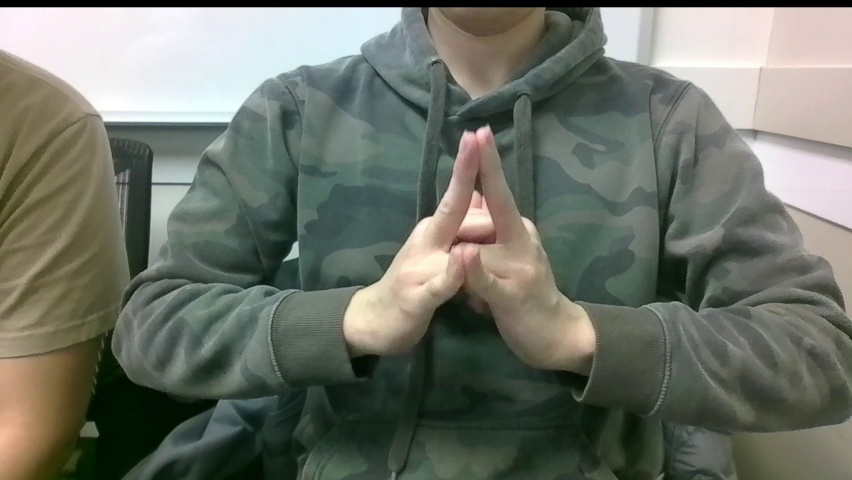

In [30]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("/content/dataset_hand_gestures/bird.jpg")
cv2_imshow(img)

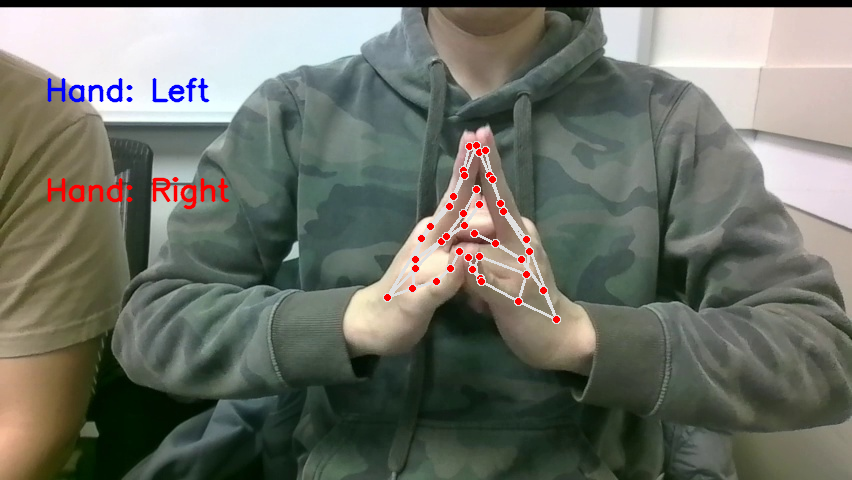

In [33]:
import mediapipe as mp
import cv2

# Load the input image.
image_landmark = cv2.imread('/content/dataset_hand_gestures/bird.jpg')

# Initialize MediaPipe Hands model
hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2)

# Convert the BGR image to RGB
image_rgb = cv2.cvtColor(image_landmark, cv2.COLOR_BGR2RGB)

# Process the image and detect hand landmarks
results = hands.process(image_rgb)

# Check if hand landmarks are detected
if results.multi_hand_landmarks:
    # Iterate over each detected hand
    for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
        # Draw landmarks on the image
        mp.solutions.drawing_utils.draw_landmarks(image_landmark, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)

        # Get the hand label
        hand_label = handedness.classification[0].label

        # Display the hand label
        if hand_label == "Left":
            cv2.putText(image_landmark, f'Hand: {hand_label}', (45, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        else:
            cv2.putText(image_landmark, f'Hand: {hand_label}', (45, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

# Display the image with landmarks
cv2_imshow(image_landmark)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [34]:
# Imports neccessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Create a GestureRecognizer object.
model_path = os.path.abspath("naruto_hand_gestures.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

# Load the input image.
image = mp.Image.create_from_file('/content/dataset_hand_gestures/bird.jpg')
# image = mp.Image.create_from_file('/content/dataset_hand_gestures/2.jpg')

# Run gesture recognition.
recognition_result = recognizer.recognize(image)

# Display the most likely gesture.
top_gesture = recognition_result.gestures[0][0]
print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

Gesture recognized: bird (0.7192204594612122)


In [36]:
from google.colab.patches import cv2_imshow
import mediapipe as mp
import cv2
from mediapipe.tasks.python import vision

# Load the gesture recognition model
model_path = "naruto_hand_gestures.task"
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)
recognizer_landmark = mp.solutions.hands.Hands(static_image_mode=False, max_num_hands=2)

# Open video file
cap = cv2.VideoCapture('/content/dataset_hand_gestures/howard_horse.mp4')

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the image horizontally for a natural viewing experience
    frame = cv2.flip(frame, 1)

    # Convert the BGR image to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe hands
    results = recognizer_landmark.process(frame_rgb)

    # Save the frame as an image file
    cv2.imwrite('temp_frame.jpg', frame_rgb)

    # Load the image file
    image = mp.Image.create_from_file('temp_frame.jpg')

    # Run gesture recognition on the frame
    recognition_result = recognizer.recognize(image)


    # Check if hand gestures are detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Do something with hand landmarks if needed
            pass

    # Display the most likely gesture

    # Draw hand landmarks and print recognition result on the frame
    if results.multi_handedness:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            hand_label = handedness.classification[0].label
            mp.solutions.drawing_utils.draw_landmarks(frame, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
            if hand_label == "Left":
              cv2.putText(frame, f'Hand: {hand_label}', (45, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
            else:
              cv2.putText(frame, f'Hand: {hand_label}', (45, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            if recognition_result.gestures:
                top_gesture = recognition_result.gestures[0][0]
                cv2.putText(frame, f'Gesture recognized: {top_gesture.category_name} ({top_gesture.score})',
                            (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2_imshow(frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
from google.colab.patches import cv2_imshow
import mediapipe as mp
import cv2
from mediapipe.tasks.python import vision

# Load the gesture recognition model
model_path = "naruto_hand_gestures.task"
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)
recognizer_landmark = mp.solutions.hands.Hands(static_image_mode=False, max_num_hands=2)

# Open video file
cap = cv2.VideoCapture('/content/dataset_hand_gestures/eddie_dog.mp4')

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the image horizontally for a natural viewing experience
    frame = cv2.flip(frame, 1)

    # Convert the BGR image to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe hands
    results = recognizer_landmark.process(frame_rgb)

    # Save the frame as an image file
    cv2.imwrite('temp_frame.jpg', frame_rgb)

    # Load the image file
    image = mp.Image.create_from_file('temp_frame.jpg')

    # Run gesture recognition on the frame
    recognition_result = recognizer.recognize(image)


    # Check if hand gestures are detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Do something with hand landmarks if needed
            pass

    # Display the most likely gesture

    # Draw hand landmarks and print recognition result on the frame
    if results.multi_handedness:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            hand_label = handedness.classification[0].label
            mp.solutions.drawing_utils.draw_landmarks(frame, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
            if hand_label == "Left":
              cv2.putText(frame, f'Hand: {hand_label}', (45, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
            else:
              cv2.putText(frame, f'Hand: {hand_label}', (45, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            if recognition_result.gestures:
                top_gesture = recognition_result.gestures[0][0]
                cv2.putText(frame, f'Gesture recognized: {top_gesture.category_name} ({top_gesture.score})',
                            (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2_imshow(frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
from google.colab.patches import cv2_imshow
import mediapipe as mp
import cv2
from mediapipe.tasks.python import vision

# Load the gesture recognition model
model_path = "naruto_hand_gestures.task"
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)
recognizer_landmark = mp.solutions.hands.Hands(static_image_mode=False, max_num_hands=2)

# Open video file
cap = cv2.VideoCapture('/content/dataset_hand_gestures/henry_sheep.mp4')

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the image horizontally for a natural viewing experience
    frame = cv2.flip(frame, 1)

    # Convert the BGR image to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe hands
    results = recognizer_landmark.process(frame_rgb)

    # Save the frame as an image file
    cv2.imwrite('temp_frame.jpg', frame_rgb)

    # Load the image file
    image = mp.Image.create_from_file('temp_frame.jpg')

    # Run gesture recognition on the frame
    recognition_result = recognizer.recognize(image)


    # Check if hand gestures are detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Do something with hand landmarks if needed
            pass

    # Display the most likely gesture

    # Draw hand landmarks and print recognition result on the frame
    if results.multi_handedness:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            hand_label = handedness.classification[0].label
            mp.solutions.drawing_utils.draw_landmarks(frame, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
            if hand_label == "Left":
              cv2.putText(frame, f'Hand: {hand_label}', (45, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
            else:
              cv2.putText(frame, f'Hand: {hand_label}', (45, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            if recognition_result.gestures:
                top_gesture = recognition_result.gestures[0][0]
                cv2.putText(frame, f'Gesture recognized: {top_gesture.category_name} ({top_gesture.score})',
                            (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2_imshow(frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()